Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook. You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

da = pd.read_csv("nhanes_2015_2016.csv")
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


### Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable DMDMARTL to partition this sample into two groups - women who are currently married, and women who are not currently married. Within each of these groups, calculate the proportion of women who have completed college. Calculate 95% confidence intervals for each of these proportions.


In [2]:
df = da.loc[(da.RIAGENDR == 2) & (da.RIDAGEYR >= 35) & (da.RIDAGEYR <= 50), ["DMDMARTL", "DMDEDUC2"]]
df["married"] = df.DMDMARTL.map({1:1, 2:0, 3:0, 4:0, 5:0, 6:0}) # Unmapped values become NA
df["college_completed"] = df.DMDEDUC2.map({1:0, 2:0, 3:0, 4:0, 5:1}) # Unmapped values become NA
df = df[["married", "college_completed"]].dropna()
df.head()

,married,college_completed
4,0,0
34,1,0
50,1,0
52,0,0
55,1,0


In [3]:
pd.crosstab(df.married, df.college_completed)

college_completed,0,1
married,,
0,266,72
1,287,162


In [4]:
dz = df.groupby(["married"]).agg({"college_completed":[np.sum,np.mean,np.size]})
dz.columns = ["college_completed", "proportion", "n"]
dz

,college_completed,proportion,n
married,,,
0,72,0.213018,338
1,162,0.360802,449


In [5]:
# Calculate 95% confidence intervals 

p = dz.proportion[0] # not married proportion
n = dz.n[0] # not married total
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)  
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)  
print(lcb, ucb)

0.1693673655848136 0.25666813737376626


In [6]:
p = dz.proportion[1] #  married proportion
n = dz.n[1] # married total
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)  
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)  
print(lcb, ucb)

0.3163811208674688 0.4052224426069187


In [7]:
# 95% CI for the proportion of those not married, completed college
sm.stats.proportion_confint(72, 338)  

(0.16936816767089768, 0.2566673352876822)

In [8]:
# 95% CI for the proportion of those married, completed college
sm.stats.proportion_confint(162, 449)

(0.31638193710753626, 0.4052216263668512)

Q1a. Identify which of the two confidence intervals is wider, and explain why this is the case.

Despite that the first sample has a higher n value, the second sample has lower standard deviation which compensates for the difference which makes the two samples have a very close confidence interval range. Sample 1 has a wider confidence interval due to the size of the sample but the difference is barely noticeable.

Q1b. Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

A higher proportion of women who are currently married have completed their college in comparison to women who are not currently married. 32% to 40% of women who are currently married have completed their college while only 17% to 26% for women who are not married. This is a significant difference between our 2 groups and we are 95% sure in the results.

### Question 2

Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the difference between those two gender proportions.


In [9]:
df = da.loc[:,:]
df["smoker"] = df.SMQ020.map({1: 1, 2: 0})  # np.nan represents a missing value
df["gender"] = df.RIAGENDR.map({1: "Male", 2: "Female"})
dx = df[["smoker", "gender"]].dropna()

In [10]:
pd.crosstab(df.gender, df.smoker)

smoker,0.0,1.0
gender,,
Female,2066,906
Male,1340,1413


In [11]:
dz = df.groupby(["gender"]).agg({"smoker":[np.sum,np.mean,np.size]})
dz.columns = ["smokes", "proportion", "n"]
dz

,smokes,proportion,n
gender,,,
Female,906.0,0.304845,2976
Male,1413.0,0.513258,2759


In [12]:
# 95% confidence intervals for female

p = dz.proportion.Female # female proportion
n = dz.n.Female # female total
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)  
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)  
print(lcb, ucb)

0.28830581027959534 0.3213846338657613


In [13]:
# 95% confidence intervals for male

p = dz.proportion.Male # male proportion
n = dz.n.Male # male total
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)  
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)  
print(lcb, ucb)

0.4946074626459384 0.5319090647786893


In [14]:
# Calculate standard error for female

p = dz.proportion.Female # Female proportion
n = dz.n.Female # Total number of females
se_female = np.sqrt(p * (1 - p) / n)
print(se_female)

0.008438475404634192


In [15]:
# Calculate standard error for male
p = dz.proportion.Male # Male proportion
n = dz.n.Male # Total number of males
se_male = np.sqrt(p * (1 - p) / n)
print(se_male)

0.009515714829783395


In [16]:
# 95% confidence interval for the difference between those two gender proportions

se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.012718360581316123

In [17]:
d = dz.proportion.Female - dz.proportion.Male
lcb = d - 2 * se_diff
ucb = d + 2 * se_diff
print(lcb, ucb)

-0.23384976280226777 -0.1829763204770033


Q2a. Why might it be relevant to report the separate gender proportions and the difference between the gender proportions?

It is important to find the proportion of smokers who are female vs proportion of smokers who are male in order to compare the two genders. The proportion of smokers who are male is higher than the proportion of smokers who are female. 58% to 63% of smokers are male while 36% to 42% of smokers are female.

Q2b. How does the width of the confidence interval for the difference between the gender proportions compare to the widths of the confidence intervals for the separate gender proportions?

The confidence interval for the difference of the two proportions is wider than the confidence intervals for each proportion separately.

### Question 3

Construct a 95% interval for height (BMXHT) in centimeters. Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches. Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters


In [18]:
# Population mean question.  Note : 95% confidence level formula is different

height_cm = da['BMXHT']

In [19]:
height_cm = height_cm[~height_cm.isna()]
height_cm.reset_index(inplace=True, drop=True)

In [20]:
# In cm

np.mean(height_cm)

166.1428344791116

In [21]:
# Calculate std

std_height_cm = np.std(height_cm)
std_height_cm

10.078375319383923

In [22]:
# Calculate size/total

n = np.size(height_cm)

In [23]:
print('Lower Boundary cm: ', np.mean(height_cm) - 1.96 * (std_height_cm / np.sqrt(n)))
print('Upper Boundary cm: ', np.mean(height_cm) + 1.96 * (std_height_cm / np.sqrt(n)))  

Lower Boundary cm:  165.8805695573689
Upper Boundary cm:  166.4050994008543


In [24]:
sm.stats.DescrStatsW(height_cm).tconfint_mean()

(165.8804952776014, 166.40517368062174)

In [25]:
# In inches

height_inches = height_cm / 2.54

In [26]:
height_inches = height_inches[~height_inches.isna()]
height_inches.reset_index(inplace=True, drop=True)

In [27]:
np.mean(height_inches)

65.41056475555574

In [28]:
std_height_inches = np.std(height_inches)
std_height_inches

3.9678642989700483

In [29]:
print('Lower Boundary Inches: ', np.mean(height_inches) - 1.96 * (std_height_inches / np.sqrt(n)))
print('Upper Boundary Inches: ', np.mean(height_inches) + 1.96 * (std_height_inches / np.sqrt(n)))

Lower Boundary Inches:  65.30731084935782
Upper Boundary Inches:  65.51381866175366


In [30]:
sm.stats.DescrStatsW(height_inches).tconfint_mean()

(65.30728160535489, 65.51384790575659)

Q3a. Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

The lower and upper boundary for both cm and inches are so close to each other.

### Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [31]:
for val in [[18, 28], [29, 38], [39, 48], [49, 58], [59, 68], [69, 78], [79, 88]]:
    da_year_band = da[(da['RIDAGEYR'] >= val[0]) & (da['RIDAGEYR'] <= val[1])]
    da_year_band.reset_index(inplace=True, drop=True)
    
    bmi_males = da_year_band[da_year_band['RIAGENDR'] == 1]['BMXBMI']
    bmi_females = da_year_band[da_year_band['RIAGENDR'] == 2]['BMXBMI']
    
    bmi_males = bmi_males[~bmi_males.isna()]
    bmi_males.reset_index(inplace = True, drop = True)
    bmi_females = bmi_females[~bmi_females.isna()]
    bmi_females.reset_index(inplace = True, drop = True)
    
    bmi_males_temp = sm.stats.DescrStatsW(bmi_males)
    bmi_females_temp = sm.stats.DescrStatsW(bmi_females)
    
    cm = sm.stats.CompareMeans(bmi_males_temp, bmi_females_temp)
    lower, upper = cm.tconfint_diff(usevar = 'pooled')
    print(val)
    print("pooled: ", lower, ",", upper)
    print("pooled diff: ", abs(upper) - abs(lower))
    print('---------------------------------------------------------------------------------------')

[18, 28]
pooled:  -1.741339639227411 , 0.034817164017523994
pooled diff:  -1.706522475209887
---------------------------------------------------------------------------------------
[29, 38]
pooled:  -1.1877114002496385 , 0.6951862411159043
pooled diff:  -0.4925251591337342
---------------------------------------------------------------------------------------
[39, 48]
pooled:  -2.4438533490140424 , -0.5343193405535154
pooled diff:  -1.909534008460527
---------------------------------------------------------------------------------------
[49, 58]
pooled:  -2.3314902075137223 , -0.4729688416549196
pooled diff:  -1.8585213658588027
---------------------------------------------------------------------------------------
[59, 68]
pooled:  -2.7191581021392035 , -0.9252456993910773
pooled diff:  -1.7939124027481261
---------------------------------------------------------------------------------------
[69, 78]
pooled:  -2.8169097637577014 , -0.8181860593381438
pooled diff:  -1.9987237044195576

In [32]:
# # usual replacements to follow the problem
# da['RIAGENDRx'] = da.RIAGENDR.replace({2: "Female", 1:"Male"})
# da['DMDMARTLx'] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3:"Divorced", 4: "Separated",\
#                                        5: "Never Married", 6: "Living with partner", 77: "Refused",\
#                                        99: "Do not know", np.nan: 'Missing'})

# da['DMDEDUC2x'] = da.DMDEDUC2.replace({1: '<9', 2:'9-11', 3:'High school', 4:'Some college',\
#                                       5:'College', 7:'Refused', 9:"Do not know", np.nan: 'Missing'})

# #define the bins and then create them in a new column; 
# bins=[18, 28, 38, 48, 58, 68 , 80]
# da['agegrp'] = pd.cut(da.RIDAGEYR, bins, include_lowest=True,\
#                       labels=['[18,28]', '[29,38]', '[39,48]','[49,58]', '[59,68]', '[69,80]'])
                                                                      
# #dropping NaN values from BMXBMI (along with corresponding line from agegrp and RIAGENDRx)                                                                     
# da.dropna(subset=['agegrp','BMXBMI','RIAGENDRx'], how='any', inplace=True)
# db = da[['agegrp', 'BMXBMI', 'RIAGENDRx']]
# dc = db.groupby(['agegrp','RIAGENDRx']).agg({'BMXBMI':[np.mean,np.std,np.size]})
# dc.sort_index(inplace=True) #need to sort in order to access the elements of dc (i get an error if i don't)

# #Create a list for all 12 Standard Errors (for Female and Male for each age-group)
# list_SE = []
# for row in dc.iterrows():
#     SE = row[1][1] / np.sqrt(row[1][2])
#     list_SE.append(SE)

# #Create a list for all 6 Differences between SEs for each (gender)pair, for each age-group
# list_sem_diff = []
# for index, val in enumerate(list_SE):
#     if index % 2 == 0:
#         sem_diff = np.sqrt(list_SE[index] ** 2 + list_SE[index + 1] ** 2)
#         list_sem_diff.append(sem_diff)

# #Extract all 12 Means from the groupby (For Female and Male for each age-group)
# list_mean = []
# for row in dc.iterrows():
#     means = row[1][0]
#     list_mean.append(means)

# #Create a list with all 6 Differences between Means for each (gender)pair, for each age-group
# list_mean_diff = []
# for index, val in enumerate(list_mean): #i don't need the val (but I get an error if i don't write it)
#     if index % 2 == 0:
#         mean_diff = list_mean[index] - list_mean[index + 1]
#         list_mean_diff.append(mean_diff)

# #Confidence interval for each final pair
# list_CI = []
# for i in range(0,6):
#     lcb = list_mean_diff[i] - 1.96 * list_sem_diff[i]
#     ucb = list_mean_diff[i] + 1.96 * list_sem_diff[i]
#     CI = (lcb,ucb)
#     list_CI.append(CI)

# #Created a list for each age group so I can print in a nice form
# list_agegrp = []
# for i in range (0,12):
#     if i % 2 == 1:
#         list_agegrp.append(dc.index[i][0])
        
# for i in range (0,6):
#     print('95% Confidence Interval for', list_agegrp[i],'is =', list_CI[i])

Q4a. How do the widths of these confidence intervals differ? Provide an explanation for any substantial diferences in the confidence interval widths that you see.

The confidence interval width for the age groups is fairly equal except for the [29, 38] and [79, 88] where the width is much smaller between males and females.

### Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.


In [33]:
# enter code here

sys1 = da.BPXSY1
sys2 = da.BPXSY2
sys_diff = sys1 - sys2

sys1 = sys1[~sys1.isna()]
sys1.reset_index(inplace=True, drop=True)

sys2 = sys2[~sys2.isna()]
sys2.reset_index(inplace=True, drop=True)

sys_diff = sys_diff[~sys_diff.isna()]
sys_diff.reset_index(inplace=True, drop=True)

In [34]:
# Calculate size/total

sys1_n = np.size(sys1)
sys2_n = np.size(sys2)

In [35]:
# Calculate std

std_sys1 = np.std(sys1)
std_sys2 = np.std(sys2)

In [36]:
# Confidence level BPXSY1

print('Lower Boundary: ', np.mean(sys1) - 1.96 * (std_sys1 / np.sqrt(sys1_n)))
print('Upper Boundary: ', np.mean(sys1) + 1.96 * (std_sys1 / np.sqrt(sys1_n)))  

Lower Boundary:  124.59177929452376
Upper Boundary:  125.57744862623166


In [37]:
# Confidence level BPXSY2

print('Lower Boundary: ', np.mean(sys2) - 1.96 * (std_sys2 / np.sqrt(sys2_n)))
print('Upper Boundary: ', np.mean(sys2) + 1.96 * (std_sys2 / np.sqrt(sys2_n)))  

Lower Boundary:  124.2949681943591
Upper Boundary:  125.27106613265083


In [38]:
# Difference between first and second

lower, upper = sm.stats.DescrStatsW(sys_diff).tconfint_mean()
print(lower, ",", upper)

0.5399696008802797 , 0.8100024609561889


Q5a. Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

Yes as zero is included in the confidence interval of the first and second systolic blood pressure measures difference.

Q5b. Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

The width of the within-subject difference is lower (narrower) in comparison to the widths of the confidence intervals for the first and second measures.

### Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.


In [39]:
smokers_age = da[da['SMQ020']==1]['RIDAGEYR']
smokers_age = smokers_age[~smokers_age.isna()]
smokers_age.reset_index(inplace=True, drop=True)

non_smokers_age = da[da['SMQ020'] != 1]['RIDAGEYR']
non_smokers_age = non_smokers_age[~non_smokers_age.isna()]
non_smokers_age.reset_index(inplace=True, drop=True)

In [40]:
# Confidence interval for mean diffrence

smoke =sm.stats.DescrStatsW(smokers_age)
non_smoke =sm.stats.DescrStatsW(non_smokers_age)

cm = sm.stats.CompareMeans(smoke, non_smoke)
lower, upper = cm.tconfint_diff(usevar='pooled')
print("pooled: ", lower, ",", upper)

pooled:  5.833562476381499 , 7.746041103858306


Q6a. Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers. 

In [41]:
smokers_age.describe()

count    2319.000000
mean       52.096593
std        17.461141
min        18.000000
25%        37.000000
50%        54.000000
75%        66.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

<AxesSubplot:>

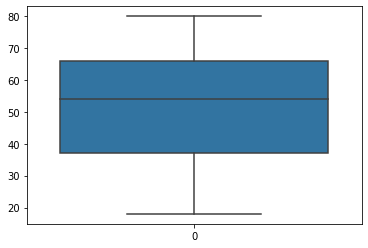

In [42]:
# insert your code here
sns.boxplot(smokers_age)

In [43]:
non_smokers_age.describe()

count    3416.000000
mean       45.306792
std        18.568337
min        18.000000
25%        29.000000
50%        44.000000
75%        60.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

<AxesSubplot:>

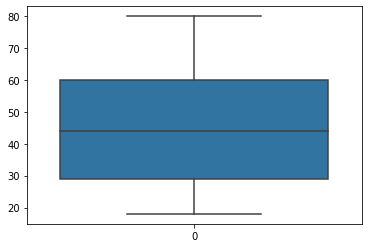

In [44]:
sns.boxplot(non_smokers_age)

<AxesSubplot:xlabel='RIDAGEYR', ylabel='Count'>

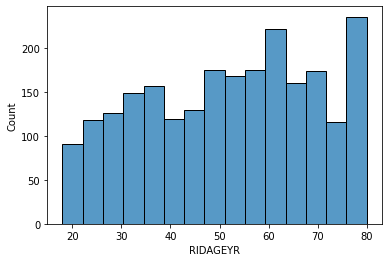

In [45]:
sns.histplot(smokers_age)

<AxesSubplot:xlabel='RIDAGEYR', ylabel='Count'>

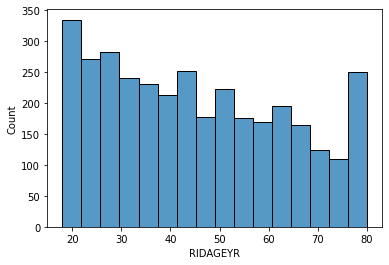

In [46]:
sns.histplot(non_smokers_age)

Q6b. Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?

Bigger margin on smokers, but still the difference is significant between populations. Distributions are skewed but samples sizes are big enough.